# Analysis notebook for mapping evaluation

Assumes results generated - see Makefile for details

In [69]:
task = "fbbt-zfa"
#task = "fbbt-wbbt"
#task = "hsapdv-mmusdv"

In [70]:
import pandas as pd

In [71]:
%run md_utils.py

## Utility SSSOM loading methods

In [72]:
def task_method_sssom_path(method: str):
    if method == "curated":
        dir = "data"
    else:
        dir = "results"
    return f"../{dir}/{method}-{task}.sssom.tsv"

In [73]:
def load_sssom(method):
    path = task_method_sssom_path(method)
    df = pd.read_csv(path, sep="\t", comment="#")
    df["mapping_source"]  = method
    if method == "lexmatch":
        df[["predicate_id"]] = "skos:exactMatch"
    return df.drop_duplicates()

lexmatch = load_sssom("lexmatch")
lexmatch

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:exactMatch,ZFA:0001094,whole organism,semapv:LexicalMatching,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,caro:0000012,lexmatch
1,FBbt:00000001,organism,skos:exactMatch,ZFA:0001094,whole organism,semapv:LexicalMatching,oaklib,0.5,oio:hasRelatedSynonym,rdfs:label,whole organism,lexmatch
2,FBbt:00000004,head,skos:exactMatch,ZFA:0001114,head,semapv:LexicalMatching,oaklib,0.5,rdfs:label,rdfs:label,head,lexmatch
3,FBbt:00000034,egg,skos:exactMatch,ZFA:0001109,oocyte,semapv:LexicalMatching,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,egg,lexmatch
4,FBbt:00000034,egg,skos:exactMatch,ZFA:0001570,unfertilized egg,semapv:LexicalMatching,oaklib,0.5,rdfs:label,oio:hasExactSynonym,egg,lexmatch
...,...,...,...,...,...,...,...,...,...,...,...,...
320,FBbt:00111203,embryonic/larval superior medial protocerebrum,skos:exactMatch,ZFA:0000014,dorsal aorta,semapv:LexicalMatching,oaklib,0.5,oio:hasNarrowSynonym,oio:hasExactSynonym,da,lexmatch
321,FBbt:00111203,embryonic/larval superior medial protocerebrum,skos:exactMatch,ZFA:0000181,caudal zone of dorsal telencephalon,semapv:LexicalMatching,oaklib,0.5,oio:hasNarrowSynonym,oio:hasExactSynonym,dp,lexmatch
322,FBbt:00111204,embryonic/larval superior clamp,skos:exactMatch,ZFA:0007006,lip,semapv:LexicalMatching,oaklib,0.5,oio:hasRelatedSynonym,rdfs:label,lip,lexmatch
323,FBbt:00111304,adult sex peptide abdominal ganglion neuron,skos:exactMatch,ZFA:0000588,statoacoustic (VIII) ganglion,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,sag,lexmatch


In [74]:
lexmatch.groupby(["subject_match_field", "object_match_field"]).count()

subject_id  subject_label   
subject_match_field   object_match_field                                 
oio:hasBroadSynonym   oio:hasExactSynonym             6              6  \
                      oio:hasRelatedSynonym           1              1   
                      rdfs:label                      6              6   
oio:hasDbXref         oio:hasDbXref                  40             40   
oio:hasExactSynonym   oio:hasExactSynonym            64             64   
                      oio:hasRelatedSynonym           8              8   
                      rdfs:label                     17             17   
oio:hasNarrowSynonym  oio:hasExactSynonym             2              2   
                      rdfs:label                      1              1   
oio:hasRelatedSynonym oio:hasExactSynonym            37             37   
                      oio:hasRelatedSynonym           8              8   
                      rdfs:label                     17             17   
rdfs:label            oio:hasExactSynonym             9              9   
                      oio:hasRelatedSynonym           7              7   
                      rdfs:label                    102            102   

                                             predicate_id  object_id   
subject_match_field   object_match_field                               
oio:hasBroadSynonym   oio:hasExactSynonym               6          6  \
                      oio:hasRelatedSynonym             1          1   
                      rdfs:label                        6          6   
oio:hasDbXref         oio:hasDbXref                    40         40   
oio:hasExactSynonym   oio:hasExactSynonym              64         64   
                      oio:hasRelatedSynonym             8          8   
                      rdfs:label                       17         17   
oio:hasNarrowSynonym  oio:hasExactSynonym               2          2   
                      rdfs:label                        1          1   
oio:hasRelatedSynonym oio:hasExactSynonym              37         37   
                      oio:hasRelatedSynonym             8          8   
                      rdfs:label                       17         17   
rdfs:label            oio:hasExactSynonym               9          9   
                      oio:hasRelatedSynonym             7          7   
                      rdfs:label                      102        102   

                                             object_label   
subject_match_field   object_match_field                    
oio:hasBroadSynonym   oio:hasExactSynonym               6  \
                      oio:hasRelatedSynonym             1   
                      rdfs:label                        6   
oio:hasDbXref         oio:hasDbXref                    40   
oio:hasExactSynonym   oio:hasExactSynonym              64   
                      oio:hasRelatedSynonym             8   
                      rdfs:label                       17   
oio:hasNarrowSynonym  oio:hasExactSynonym               2   
                      rdfs:label                        1   
oio:hasRelatedSynonym oio:hasExactSynonym              37   
                      oio:hasRelatedSynonym             8   
                      rdfs:label                       17   
rdfs:label            oio:hasExactSynonym               9   
                      oio:hasRelatedSynonym             7   
                      rdfs:label                      102   

                                             mapping_justification   
subject_match_field   object_match_field                             
oio:hasBroadSynonym   oio:hasExactSynonym                        6  \
                      oio:hasRelatedSynonym                      1   
                      rdfs:label                                 6   
oio:hasDbXref         oio:hasDbXref                             40   
oio:hasExactSynonym   oio:hasExactSynonym                       64   
                      oio:hasRela

In [75]:
curated = load_sssom("curated")
curated

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:exactMatch,ZFA:0001094,whole organism,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref,caro:0000012,curated
1,FBbt:00000001,organism,skos:exactMatch,ZFA:0001094,whole organism,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000468,curated
5,FBbt:00000001,organism,skos:exactMatch,ZFA:0001094,whole organism,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000468,curated
21,FBbt:00000004,head,skos:exactMatch,ZFA:0001114,head,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000033,curated
25,FBbt:00000004,head,skos:exactMatch,ZFA:0001114,head,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000033,curated
...,...,...,...,...,...,...,...,...,...,...,...,...
945,FBbt:00100314,duct,skos:exactMatch,ZFA:0005171,duct,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000058,curated
949,FBbt:00100314,duct,skos:exactMatch,ZFA:0005171,duct,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000058,curated
965,FBbt:00111202,anatomical line,skos:exactMatch,ZFA:0001689,anatomical line,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref,caro:0000008,curated
966,FBbt:10000000,anatomical entity,skos:exactMatch,ZFA:0100000,zebrafish anatomical entity,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0001062,curated


In [76]:
gpt3 = load_sssom("gpt3")
gpt3

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:broadMatch,ZFA:0001094,whole organism,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,caro:0000012,gpt3
1,FBbt:00000001,organism,skos:broadMatch,ZFA:0001094,whole organism,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasRelatedSynonym,rdfs:label,whole organism,gpt3
2,FBbt:00000004,head,skos:relatedMatch,ZFA:0001114,head,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,rdfs:label,rdfs:label,head,gpt3
3,FBbt:00000034,egg,skos:broadMatch,ZFA:0001109,oocyte,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,egg,gpt3
4,FBbt:00000034,egg,skos:narrowMatch,ZFA:0001570,unfertilized egg,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,rdfs:label,oio:hasExactSynonym,egg,gpt3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,FBbt:00111203,embryonic/larval superior medial protocerebrum,skos:relatedMatch,ZFA:0000014,dorsal aorta,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasNarrowSynonym,oio:hasExactSynonym,da,gpt3
321,FBbt:00111203,embryonic/larval superior medial protocerebrum,skos:narrowMatch,ZFA:0000181,caudal zone of dorsal telencephalon,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasNarrowSynonym,oio:hasExactSynonym,dp,gpt3
322,FBbt:00111204,embryonic/larval superior clamp,owl:differentFrom,ZFA:0007006,lip,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasRelatedSynonym,rdfs:label,lip,gpt3
323,FBbt:00111304,adult sex peptide abdominal ganglion neuron,skos:broadMatch,ZFA:0000588,statoacoustic (VIII) ganglion,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,sag,gpt3


In [77]:
gpt4 = load_sssom("gpt4")
gpt4

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:relatedMatch,ZFA:0001094,whole organism,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,caro:0000012,gpt4
1,FBbt:00000001,organism,skos:relatedMatch,ZFA:0001094,whole organism,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasRelatedSynonym,rdfs:label,whole organism,gpt4
2,FBbt:00000004,head,skos:exactMatch,ZFA:0001114,head,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,rdfs:label,rdfs:label,head,gpt4
3,FBbt:00000034,egg,skos:broadMatch,ZFA:0001109,oocyte,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,egg,gpt4
4,FBbt:00000034,egg,skos:narrowMatch,ZFA:0001570,unfertilized egg,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,rdfs:label,oio:hasExactSynonym,egg,gpt4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,FBbt:00111203,embryonic/larval superior medial protocerebrum,owl:differentFrom,ZFA:0000014,dorsal aorta,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasNarrowSynonym,oio:hasExactSynonym,da,gpt4
321,FBbt:00111203,embryonic/larval superior medial protocerebrum,skos:relatedMatch,ZFA:0000181,caudal zone of dorsal telencephalon,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasNarrowSynonym,oio:hasExactSynonym,dp,gpt4
322,FBbt:00111204,embryonic/larval superior clamp,owl:differentFrom,ZFA:0007006,lip,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasRelatedSynonym,rdfs:label,lip,gpt4
323,FBbt:00111304,adult sex peptide abdominal ganglion neuron,owl:differentFrom,ZFA:0000588,statoacoustic (VIII) ganglion,semapv:LexicalMatching,FBbt,ZFA,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,sag,gpt4


In [78]:
pd.concat([gpt3, gpt4]).groupby(["mapping_source", "predicate_id"]).count()

subject_id  subject_label  object_id   
mapping_source predicate_id                                              
gpt3           owl:differentFrom          79             79         79  \
               skos:broadMatch            45             45         45   
               skos:exactMatch            80             80         80   
               skos:narrowMatch           61             61         61   
               skos:relatedMatch          60             60         60   
gpt4           owl:differentFrom         113            113        113   
               skos:broadMatch             3              3          3   
               skos:exactMatch           145            145        145   
               skos:narrowMatch            9              9          9   
               skos:relatedMatch          55             55         55   

                                  object_label  mapping_justification   
mapping_source predicate_id                                             
gpt3           owl:differentFrom            79                     79  \
               skos:broadMatch              45                     45   
               skos:exactMatch              80                     80   
               skos:narrowMatch             61                     61   
               skos:relatedMatch            60                     60   
gpt4           owl:differentFrom           113                    113   
               skos:broadMatch               3                      3   
               skos:exactMatch             145                    145   
               skos:narrowMatch              9                      9   
               skos:relatedMatch            55                     55   

                                  subject_source  object_source  mapping_tool   
mapping_source predicate_id                                                     
gpt3           owl:differentFrom              79             79            79  \
               skos:broadMatch                45             45            45   
               skos:exactMatch                80             80            80   
               skos:narrowMatch               61             61            61   
               skos:relatedMatch              60             60            60   
gpt4           owl:differentFrom             113            113           113   
               skos:broadMatch                 3              3             3   
               skos:exactMatch               145            145           145   
               skos:narrowMatch                9              9             9   
               skos:relatedMatch              55             55            55   

                                  confidence  subject_match_field   
mapping_source predicate_id                                         
gpt3           owl:differentFrom          79                   79  \
               skos:broadMatch            45                   45   
               skos:exactMatch            80                   80   
               skos:narrowMatch           61                   61   
               skos:relatedMatch          60                   60   
gpt4           owl:differentFrom         113                  113   
               skos:broadMatch             3                    3   
               skos:exactMatch           145                  145   
               skos:narrowMatch            9                    9   
               skos:relatedMatch          55                   55   

                                  object_match_field  match_string  
mapping_source predicate_id                                         
gpt3           owl:differentFrom                  79            79  
               skos:broadMatch                    45            45  
               skos:exactMatch                    80            80  
               skos:narrowMatch                   61            61  
               skos:relatedMatch                  60

In [79]:
logmap = load_sssom("logmap")
logmap

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
0,FBbt:00004055,ZFA:0005663,0.79,skos:exactMatch,adult dorsal prothoracic nerve,dorsal spinal nerve,logmap
1,FBbt:00007173,ZFA:0009060,0.79,skos:exactMatch,cholinergic neuron,cholinergic neuron,logmap
2,FBbt:00047548,ZFA:0009088,0.57,skos:exactMatch,adult mesothoracic anterior anterior ventral c...,professional antigen presenting cell,logmap
3,FBbt:00000286,ZFA:0005685,0.67,skos:exactMatch,larval dorsal group tracheal branch 1,dG1,logmap
4,FBbt:00111202,ZFA:0001689,0.79,skos:exactMatch,anatomical line,anatomical line,logmap
...,...,...,...,...,...,...,...
202,FBbt:00003232,ZFA:0009291,0.63,skos:exactMatch,embryonic precursor cell of adult muscle,muscle precursor cell,logmap
203,FBbt:00005378,ZFA:0000038,0.94,skos:exactMatch,wing margin,margin,logmap
204,FBbt:00058901,ZFA:0005269,0.69,skos:exactMatch,basalar muscle 49,abductor muscle,logmap
205,FBbt:00004086,ZFA:0005820,0.58,skos:exactMatch,campaniform sensillum of anterior crossvein,ventral caudal adductor,logmap


In [80]:
def filter_logmap(df, thresh: float):
    return df.query(f"confidence > {thresh}")
filter_logmap(logmap, 0.8)

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
6,FBbt:00000440,ZFA:0000066,0.91,skos:exactMatch,proctodeum,proctodeum,logmap
7,FBbt:00001408,ZFA:0009011,0.96,skos:exactMatch,neuroblast X,neuroblast,logmap
8,FBbt:00047097,ZFA:0009242,0.95,skos:exactMatch,primary neuron,primary neuron,logmap
14,FBbt:00000439,ZFA:0001290,0.94,skos:exactMatch,stomodeum,stomodeum,logmap
17,FBbt:00005412,ZFA:0009156,0.96,skos:exactMatch,gamete,gamete,logmap
...,...,...,...,...,...,...,...
185,FBbt:00005288,ZFA:0005772,0.94,skos:exactMatch,fertilized egg,fertilized egg,logmap
186,FBbt:00004478,ZFA:0005386,0.85,skos:exactMatch,foramen,foramen,logmap
190,FBbt:00005145,ZFA:0009010,0.89,skos:exactMatch,glioblast,glioblast,logmap
199,FBbt:00005098,ZFA:0000142,0.90,skos:exactMatch,peripheral nervous system,peripheral nervous system,logmap


In [81]:
def evaluate(results, gold):
    # filtered = results.query("predicate_id != 'owl:differentFrom'")
    filtered = results.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "object_id"]
    results_set = set([tuple(x) for x in filtered[cols].values])
    gold_set = set([tuple(x) for x in gold[cols].values])

    # Calculate TP, FP, FN
    TP = len(results_set.intersection(gold_set))
    FP = len(results_set.difference(gold_set))
    FN = len(gold_set.difference(results_set))

    # Calculate precision and recall
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    # Calculate F1 score
    F1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return F1, precision, recall

evaluate(gpt3, curated)

(0.435483870967742, 0.5192307692307693, 0.375)

In [82]:
pairs = [(conf, evaluate(filter_logmap(logmap, conf), curated)[0]) for conf in sorted(set(pd.unique(logmap['confidence'])))]
pairs = sorted(pairs, key=lambda x: -x[1])
pairs[0:5]

[(0.75, 0.4891304347826087),
 (0.76, 0.48044692737430167),
 (0.77, 0.48000000000000004),
 (0.73, 0.4742268041237113),
 (0.74, 0.4736842105263158)]

In [83]:
logmap_best = filter_logmap(logmap, pairs[0][0])
logmap_best

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
0,FBbt:00004055,ZFA:0005663,0.79,skos:exactMatch,adult dorsal prothoracic nerve,dorsal spinal nerve,logmap
1,FBbt:00007173,ZFA:0009060,0.79,skos:exactMatch,cholinergic neuron,cholinergic neuron,logmap
4,FBbt:00111202,ZFA:0001689,0.79,skos:exactMatch,anatomical line,anatomical line,logmap
6,FBbt:00000440,ZFA:0000066,0.91,skos:exactMatch,proctodeum,proctodeum,logmap
7,FBbt:00001408,ZFA:0009011,0.96,skos:exactMatch,neuroblast X,neuroblast,logmap
...,...,...,...,...,...,...,...
189,FBbt:00005684,ZFA:0000028,0.80,skos:exactMatch,heart primordium,heart primordium,logmap
190,FBbt:00005145,ZFA:0009010,0.89,skos:exactMatch,glioblast,glioblast,logmap
192,FBbt:00001685,ZFA:0009285,0.77,skos:exactMatch,embryonic/larval plasmatocyte,podocyte,logmap
199,FBbt:00005098,ZFA:0000142,0.90,skos:exactMatch,peripheral nervous system,peripheral nervous system,logmap


In [85]:
def mk_results(dfs):
    combined = pd.concat(dfs)
    objs = []
    for df in dfs:
        methods = set(pd.unique(df["mapping_source"]))
        assert len(methods) == 1
        method = list(methods)[0]
        f1, p, r = evaluate(df, curated)
        objs.append({"method": method, "f1": f1, "P": p, "R": r})
    return pd.DataFrame(objs)
    
  

summary = mk_results([lexmatch, logmap_best, gpt3, gpt4])
#summary.to_markdown(f"main-results-{task}.md")
as_md_table(summary, f"table-main-results-{task}.md")
summary.style.highlight_max(props='font-weight:bold').format(precision=3)

,method,f1,P,R
0,lexmatch,0.350,0.220,0.847
1,logmap,0.489,0.402,0.625
2,gpt3,0.435,0.519,0.375
3,gpt4,0.651,0.560,0.778


In [60]:
import matplotlib.pyplot as plt

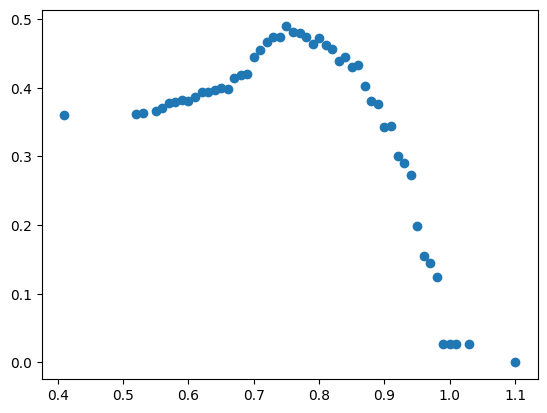

In [61]:
x, y = zip(*pairs)

# Create a scatter plot
plt.scatter(x, y)

# Show the plot
plt.show()

In [62]:
import seaborn as sns

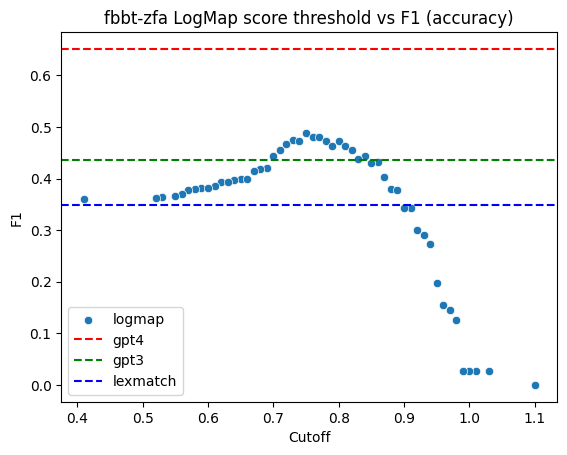

In [93]:
df = pd.DataFrame(pairs, columns=['Cutoff', 'F1'])

# Create a scatter plot
sns.scatterplot(data=df, x='Cutoff', y='F1', label="logmap")

lines = [(gpt4, "gpt4", "red"), (gpt3, "gpt3", "green"), (lexmatch, "lexmatch", "blue")]

for r, label, color in lines:
    plt.axhline(evaluate(r, curated)[0], color=color, linestyle='--', label=label)

plt.legend()

# Adding labels
plt.xlabel('Cutoff')
plt.ylabel('F1')
plt.title(f'{task} LogMap score threshold vs F1 (accuracy)')

plt.savefig(f"../content/images/logmap-scatter-plot-{task}.pdf", format='pdf')

# Show the plot
plt.show()

In [87]:
import plotly

In [88]:
import plotly.io as pio
pio.renderers.default='notebook'

In [89]:
plt.savefig(f"logmap-scatter-plot-{task}.pdf", format='pdf')

<Figure size 640x480 with 0 Axes>

In [90]:
plt.savefig(f"logmap-scatter-plot-{task}.png", format='png')

<Figure size 640x480 with 0 Axes>

In [91]:
def diffs(x, y):
    x2 = x.query("predicate_id == 'skos:exactMatch'")
    y2 = y.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "subject_label", "object_id", "object_label"]
    xset = set([tuple(v) for v in x2[cols].values])
    yset = set([tuple(v) for v in y2[cols].values])
    return xset-yset

diffs(logmap_best, gpt4)

{('FBbt:00000001', 'organism', 'ZFA:0001094', 'whole organism'),
 ('FBbt:00000035', 'yolk', 'ZFA:0000084', 'yolk'),
 ('FBbt:00001061', 'ventral neurectoderm', 'ZFA:0001120', 'neuroectoderm'),
 ('FBbt:00001408', 'neuroblast X', 'ZFA:0009011', 'neuroblast'),
 ('FBbt:00001573', 'EN neuron', 'ZFA:0009248', 'neuron'),
 ('FBbt:00001685', 'embryonic/larval plasmatocyte', 'ZFA:0009285', 'podocyte'),
 ('FBbt:00002597',
  'larval abdominal median nerve',
  'ZFA:0005663',
  'dorsal spinal nerve'),
 ('FBbt:00003144',
  'adult posterior hindgut',
  'ZFA:0000706',
  'posterior intestine'),
 ('FBbt:00004055',
  'adult dorsal prothoracic nerve',
  'ZFA:0005663',
  'dorsal spinal nerve'),
 ('FBbt:00004179', 'sacculus', 'ZFA:0000428', 'saccule'),
 ('FBbt:00004191', 'cornea', 'ZFA:0000640', 'cornea'),
 ('FBbt:00004199', 'lens', 'ZFA:0000035', 'lens'),
 ('FBbt:00004200', 'retina', 'ZFA:0000152', 'retina'),
 ('FBbt:00004478', 'foramen', 'ZFA:0005386', 'foramen'),
 ('FBbt:00004499',
  'occipital foramen',
 